In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt
from datetime import timedelta, datetime

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [5]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [6]:
data = engine.execute("SELECT * FROM measurement limit 5").fetchall()
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
#Last data point
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [8]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [9]:
#Doesnt work
#dt.date(2016,8,23).strftime("%y")
#sdate = dt.date(2016, 8, 23)   # start date
#edate = dt.date(2017, 8, 23)   # end date
#delta = edate - sdate       # as timedelta
#for i in range:
#    day = query_date + timedelta(days=i)
    
#delta


In [10]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, 
       Measurement.prcp]
precipitation_ = session.query(*sel).\
order_by(Measurement.date).filter(Measurement.date.between(dt.date(2016, 8, 23),dt.date(2017, 8, 23))).all()
precipitation_


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_, columns=['Measurement Date', 'Precipitation'])
df=df.dropna()
#df['Measurement Date']=pd.to_datetime(df['Measurement Date'])
#df1=df.groupby('Measurement Date').sum()
#df1=df1.to_dict('index')
df


,Measurement Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28
11,2016-08-24,1.22


In [12]:
# Sort the dataframe by date
#Done previously

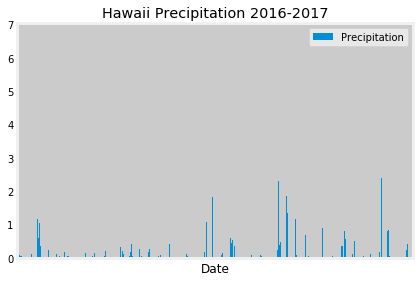

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot.bar()
plt.tight_layout()
plt.title('Hawaii Precipitation 2016-2017')
plt.xlabel('Date')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.show()

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
stations = engine.execute("SELECT * FROM station").fetchall()


In [16]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
session.query(func.count(Station.name)).all()

[(9)]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_df= pd.read_sql_query(session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date.between(dt.date(2016, 8, 23), dt.date(2017, 8, 23), Measurement.station== 'USC00519281')).statement, engine)
station_df.head()

,date,tobs
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0


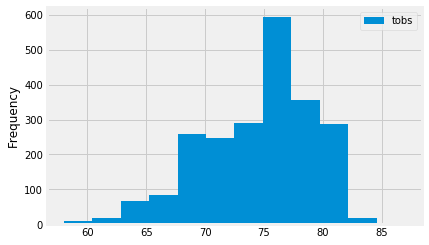

In [19]:
ax = station_df.plot.hist(bins=12)




plt.show()

In [20]:
tobs=pd.read_sql_query(session.query(func.count(Measurement.station), Measurement.station).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).statement, engine)
tobs




,count_1,station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
#highest temperature recorded, and average temperature most active station?
temps=pd.read_sql_query(session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                      filter(Measurement.station=='USC00519281').statement, engine)
temps.columns=['Min Temp','Max Temp','Avg Temp']
temps

,Min Temp,Max Temp,Avg Temp
0,54.0,85.0,71.663781


In [22]:
#Flask 
from flask import Flask, jsonify


app = Flask(__name__)

year_averages_dict= df.to_dict()
stations_dict = station_df.to_dict()



@app.route("/")
def homepage():
    return (
        f" API!<br/>"
        f"Available Routes:<br/>"
        f"/api.openweathermap.org/data/2.5/weather?units=Imperial&"
    )



@app.route("/api/v1.0/precipitation")
def climate_stations(): 
 """Return the station data as json"""
    return jsonify(station_dict)
@app.route("/")
def welcome():
    return (
        f" Surf UP available API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation"
        f"/api/v1.0/stations"
        f"/api/v1.0/tobs"
        f"/api/v1.0/<start>"
        f"/api/v1.0/<start>/<end>"
        
    )


if __name__ == "__main__":
    app.run(debug=True)






# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

IndentationError: unexpected indent (<ipython-input-22-04cfb92e7ccb>, line 25)

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start='start_date'):
    start_date = datetime.strptime('2016-08-05', '%Y-%m-%d').date()
    return pd.read_sql_query(session.query(func.max(Measurement.tobs), \
                            func.min(Measurement.tobs),\
                            func.avg(Measurement.tobs)).\
                            filter(Measurement.date >= start_date).statement, engine) 
print(calc_temps(start='start_date'))    
# function usage example
start_date = datetime.strptime('2016-08-05', '%Y-%m-%d').date()
pd.read_sql_query(session.query(func.max(Measurement.tobs), \
                            func.min(Measurement.tobs),\
                            func.avg(Measurement.tobs)).\
                            filter(Measurement.date >= start_date).statement, engine) 

In [41]:
#start_date = datetime.strptime('2016-08-05', '%Y-%m-%d').date()
#end_date = datetime.strptime('2017-08-05', '%Y-%m-%d').date()
start_end = pd.read_sql_query(session.query(Measurement.date, func.max(Measurement.tobs), \
                            func.min(Measurement.tobs),\
                            func.avg(Measurement.tobs)).\
                            filter(Measurement.date.between(dt.date(2016,8,5), dt.date(2017,8,5))).statement, engine)




start_end.index=['Date']
start_end.columns=['Date','Max Temp','Min Temp','Avg Temp']
df5=start_end.to_dict('record')
start_end


,Date,Max Temp,Min Temp,Avg Temp
Date,2017-04-30,87.0,58.0,74.644239


In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
